# **1. Understanding the Problem and Objective:**
Before diving into the data, we need understand the problem we are trying to solve and the goals of our analysis. This helps in directing our exploration and identifying relevant patterns.For this Health Insurance data,this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **2. Importing libraries and Loading the Dataset:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
traind= pd.read_csv("./data/train.csv")
testd= pd.read_csv("./data/test.csv")

In [4]:
traind.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362054 entries, 0 to 362053
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    362054 non-null  int64  
 1   Gender                362054 non-null  object 
 2   Age                   362054 non-null  int64  
 3   Driving_License       362054 non-null  int64  
 4   Region_Code           362054 non-null  float64
 5   Previously_Insured    362054 non-null  int64  
 6   Vehicle_Age           362054 non-null  object 
 7   Vehicle_Damage        362054 non-null  object 
 8   Annual_Premium        362054 non-null  float64
 9   Policy_Sales_Channel  362054 non-null  float64
 10  Vintage               362054 non-null  int64  
 11  Response              362054 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 33.1+ MB


In [8]:
traind.shape

(362054, 12)

# **3. Checking the Missing Values :**

In [9]:
missing_values = traind.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# **4. ERD:**

In [11]:
sns.set(style="whitegrid")

C:\Users\biauser\miniconda3\envs\pc311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


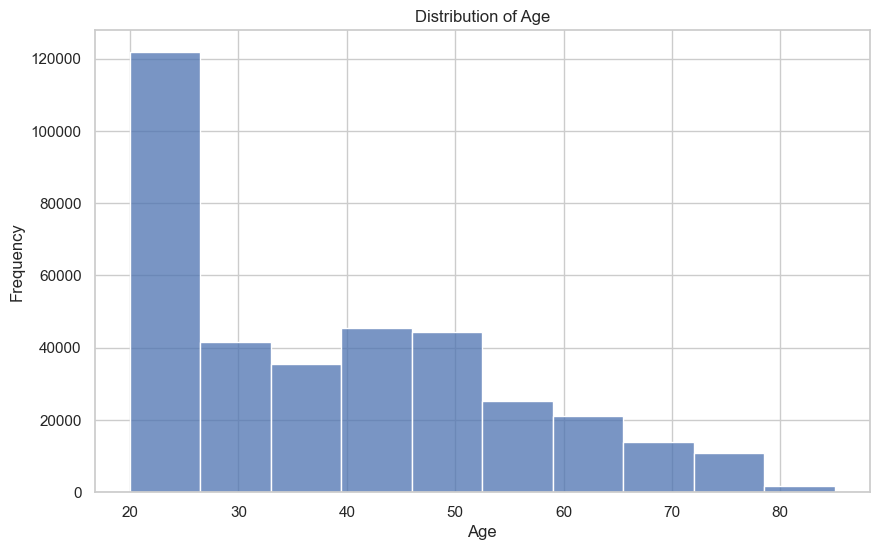

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(traind['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\biauser\miniconda3\envs\pc311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


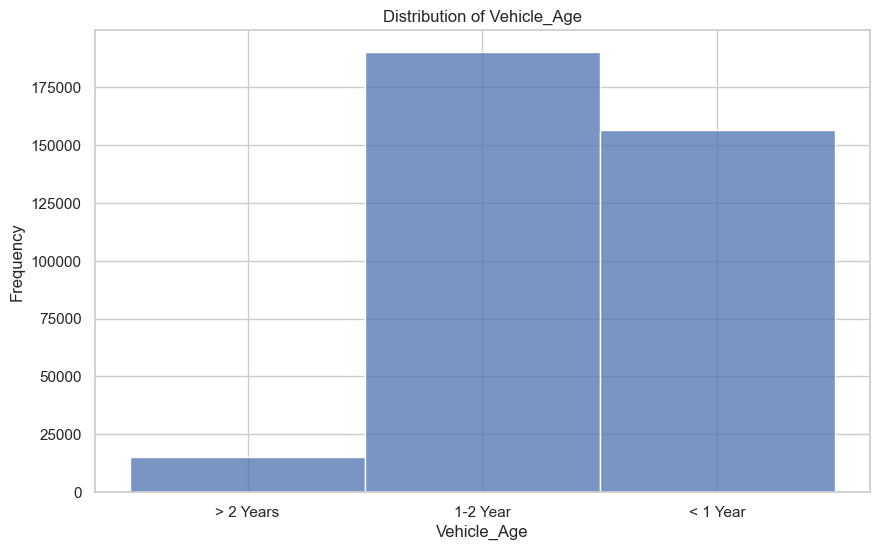

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(traind['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

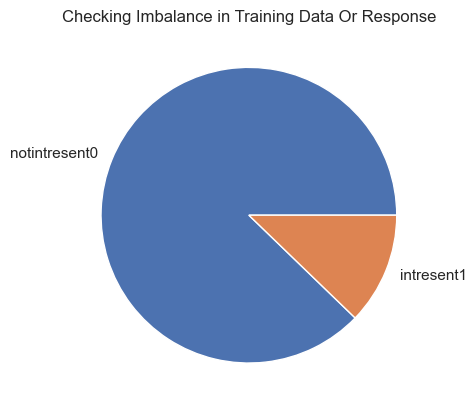

In [22]:
response_data = traind['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = ['notintresent0','intresent1'])
ax.set_title('Checking Imbalance in Training Data Or Response')

In [31]:
X_full = traind.copy()
y = X_full.Response
X_full.drop(['Response'], axis=1, inplace=True)

In [32]:
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
Response,,
0,317768,0.877681
1,44286,0.122319


Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Vehicle_Damage')

<Figure size 600x600 with 0 Axes>

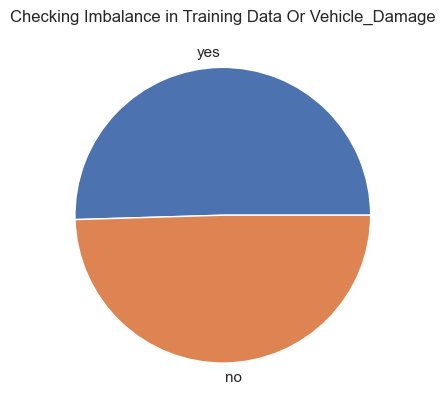

In [36]:
VehicleDamage_data = traind['Vehicle_Damage'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(VehicleDamage_data, labels = ['yes','no'])
ax.set_title('Checking Imbalance in Training Data Or Vehicle_Damage')

In [26]:
X_train = traind[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]
y_train = traind['Response']

In [28]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()

Response
0    317768
1     44286
Name: count, dtype: int64



# **5.Suggustion:**

* Based on the data and information provided, to get your company's employees to purchase automobile insurance, we give the following advice:
# Education and Awareness Raising:
First, as company employees are generally younger and less mature in their consumer attitudes, education and awareness-raising on the importance of automobile insurance may be needed. This can be done by organizing insurance knowledge seminars, providing relevant documents or video materials, etc., so that employees can understand the benefits and necessity of auto insurance.
# Personalized recommendations:
Given that the age of vehicles is mainly distributed in the range of 1 year to 2 years, and the overall low willingness of employees to purchase vehicle insurance, personalized insurance program recommendations can be provided for this group. For example, insurance packages, discounts or value-added services for new vehicle owners to entice them to purchase.
